In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
datos = pd.read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv", index_col="new_cases_smoothed",)

In [3]:
# Cargar los datos desde el enlace correcto
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv"
datos = pd.read_csv(url)


In [4]:
# Mostrar las primeras filas del dataframe para verificar la carga
print(datos.head())


  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [5]:
# Mostrar las columnas disponibles en el dataframe
print(datos.columns)

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [6]:
# Filtrar los datos para los países seleccionados (Perú y Ecuador)
paises_seleccionados = ["Peru", "Argentina"]
datos_filtrados = datos[datos["location"].isin(paises_seleccionados)]


In [7]:
# Llenar los valores NaN en la columna 'new_cases_smoothed' antes de pivotar
datos_filtrados["new_cases_smoothed"].fillna(0, inplace=True)


C:\Users\frans\AppData\Local\Temp\ipykernel_10716\3162750625.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datos_filtrados["new_cases_smoothed"].fillna(0, inplace=True)
C:\Users\frans\AppData\Local\Temp\ipykernel_10716\3162750625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_filtrados["new_cases_smoothed"].fillna(0, inplace=T

In [8]:
# Seleccionar las columnas de interés
datos_filtrados = datos_filtrados[["date", "location", "new_cases_smoothed"]]


In [9]:
# Convertir la columna 'date' a tipo datetime
datos_filtrados["date"] = pd.to_datetime(datos_filtrados["date"])


In [10]:
# Pivotar la tabla para tener fechas como índice y países como columnas
datos_pivot = datos_filtrados.pivot_table(values="new_cases_smoothed", index="date", columns="location")


In [11]:
# Visualizar las columnas 'location', 'date' y 'new_cases_smoothed'
print(datos_filtrados[['location', 'date', 'new_cases_smoothed']].head())

        location       date  new_cases_smoothed
14247  Argentina 2020-01-01                 0.0
14248  Argentina 2020-01-02                 0.0
14249  Argentina 2020-01-03                 0.0
14250  Argentina 2020-01-04                 0.0
14251  Argentina 2020-01-05                 0.0


In [12]:
# Función para animación
def update(frame):
    plt.cla()
    plt.plot(datos_pivot.index[:frame], datos_pivot['Peru'][:frame], label='Peru')
    plt.plot(datos_pivot.index[:frame], datos_pivot['Argentina'][:frame], label='Argentina')
    plt.xlabel('Fecha')
    plt.ylabel('Nuevos casos suavizados')
    plt.title('Comparación de nuevos casos entre Perú y Argentina')
    plt.legend()


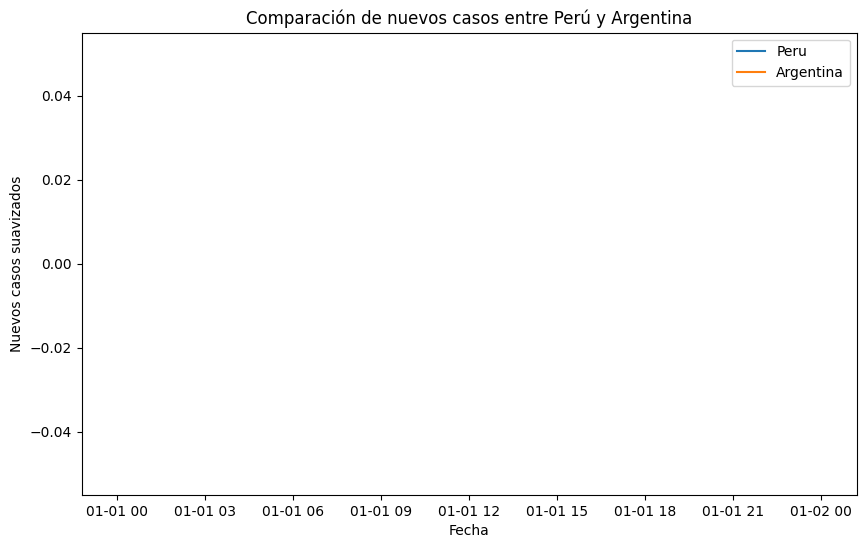

In [13]:
# Configuración de la animación
fig = plt.figure(figsize=(10, 6))
ani = FuncAnimation(fig, update, frames=len(datos_pivot), interval=100, repeat=False)


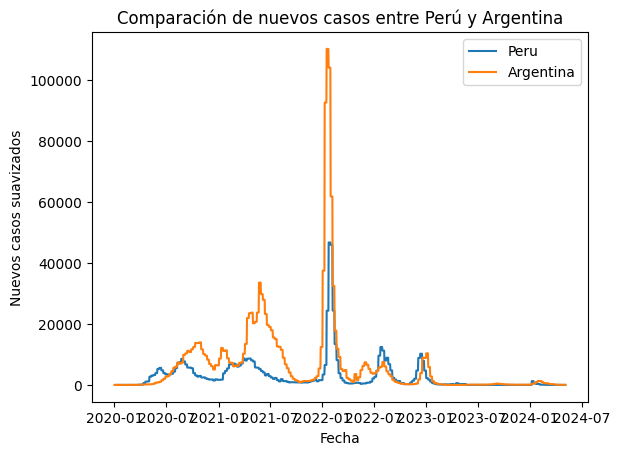

In [14]:
# Guardar la animación como video
ani.save('comparacion_peru_argentina.mp4', writer='ffmpeg')


In [17]:
# Mostrar la animación en el cuaderno
plt.show()